In [123]:
import pandas as pd 
import matplotlib.pyplot as plt

In [131]:
import sys
sys.path.append('../module')

from dataprep import *  # Importer toutes les fonctions/classes du fichier use_this.py

In [132]:
sts_df = pd.read_csv('../data/champs_2023.csv', delimiter=';')

In [133]:
new_df = node_filter(sts_df, 'sts')

In [135]:
new_df.iloc[:5]

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape


In [127]:
if 'Identifiant arc' in sts_df.columns : 
    print( True)
else :
    print (False)

True


In [47]:
def completer_heures_manquantes(df):
    min_time = df.index.min()
    max_time = df.index.max()
    full_range = pd.date_range(start=min_time, end=max_time, freq='H')  # 'H' pour une fréquence horaire

    # Réindexer votre DataFrame pour avoir une série temporelle continue
    continuous_df = df.reindex(full_range)
    return continuous_df

In [48]:
df_test = completer_heures_manquantes(df_sts_good_arc_traite)

In [52]:
len(df_sts_good_arc_traite)

7914

In [12]:
sts_good_arc_df = sts_df.loc[sts_df['Identifiant arc'] == 191]

In [15]:
df_sts_good_arc_traite = traiter_donnees(sts_good_arc_df)

In [17]:
df_sts_good_arc_traite.iloc[:3]

,Libelle,taux_occupation,etat_arc,debit_horaire
timestamp,,,,
2023-01-01 00:00:00,Sts_Peres,11.22500,Invalide,779.0
2023-01-01 01:00:00,Sts_Peres,11.70944,Invalide,684.0
2023-01-01 02:00:00,Sts_Peres,10.65111,Invalide,734.0


In [24]:
ratio_nan_taux_occupation = df_sts_good_arc_traite['taux_occupation'].isna().sum()
ratio_nan_debit_horaire = df_sts_good_arc_traite['debit_horaire'].isna().sum()

In [25]:
ratio_nan_taux_occupation, ratio_nan_debit_horaire

(104, 104)

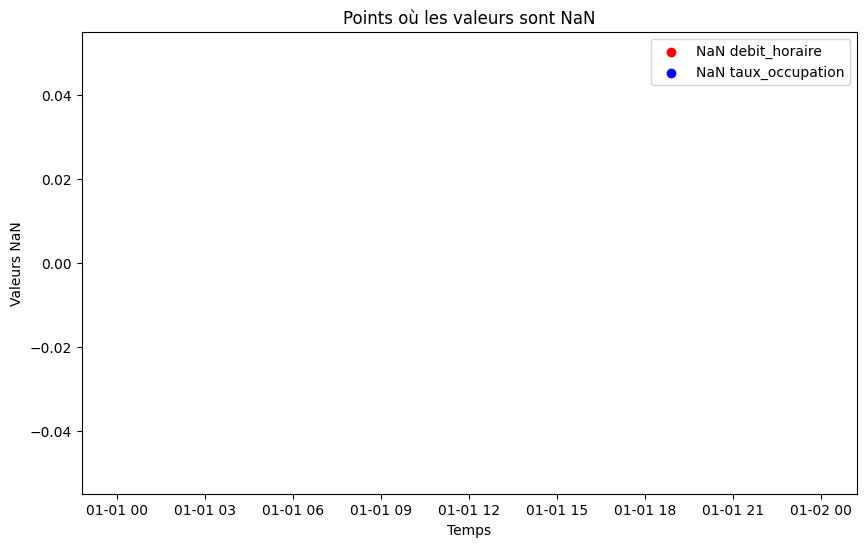

In [20]:

import matplotlib.pyplot as plt
import pandas as pd

# Supposons que df_sts_good_arc_traite est votre DataFrame avec l'index temporel
# Assurez-vous que votre index est un objet DateTimeIndex
# Si ce n'est pas le cas, vous pouvez le convertir avec : df_sts_good_arc_traite.index = pd.to_datetime(df_sts_good_arc_traite.index)

# Filtrer les lignes où 'debit_horaire' ou 'taux_occupation' sont NaN
nan_values = df_sts_good_arc_traite[df_sts_good_arc_traite['debit_horaire'].isnull() | df_sts_good_arc_traite['taux_occupation'].isnull()]

# Plot des valeurs NaN
plt.figure(figsize=(10, 6))

# Plot des valeurs NaN de 'debit_horaire'
plt.scatter(nan_values.index, nan_values['debit_horaire'], color='red', label='NaN debit_horaire')

# Plot des valeurs NaN de 'taux_occupation'
plt.scatter(nan_values.index, nan_values['taux_occupation'], color='blue', label='NaN taux_occupation')

plt.xlabel('Temps')
plt.ylabel('Valeurs NaN')
plt.title('Points où les valeurs sont NaN')
plt.legend()
plt.show()


In [26]:
df_sts_good_arc_traite['debit_horaire_nan'] = df_sts_good_arc_traite['debit_horaire'].apply(lambda x: 1 if pd.isnull(x) else 0)


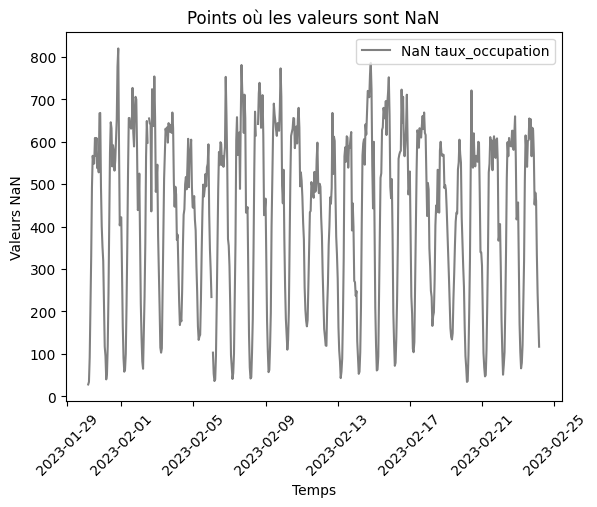

In [40]:
min_time = df_sts_good_arc_traite.index.min()
max_time = df_sts_good_arc_traite.index.max()
full_range = pd.date_range(start=min_time, end=max_time, freq='H')  # 'H' pour une fréquence horaire

# Réindexer votre DataFrame pour avoir une série temporelle continue
continuous_df = df_sts_good_arc_traite.reindex(full_range)

In [46]:
print("nombre d'heures manquantes :", len(continuous_df) - len(df_sts_good_arc_traite))

missing_hours = continuous_df[continuous_df.isnull().all(axis=1)].index

print("Heures manquantes :")
print(missing_hours)

nombre d'heures manquantes : 127
Heures manquantes :
DatetimeIndex(['2023-02-08 12:00:00', '2023-03-26 02:00:00',
               '2023-03-30 01:00:00', '2023-03-30 02:00:00',
               '2023-03-30 03:00:00', '2023-03-30 04:00:00',
               '2023-03-30 05:00:00', '2023-03-30 06:00:00',
               '2023-03-30 07:00:00', '2023-03-30 08:00:00',
               ...
               '2023-05-23 20:00:00', '2023-05-23 21:00:00',
               '2023-05-23 22:00:00', '2023-05-23 23:00:00',
               '2023-05-24 00:00:00', '2023-08-04 06:00:00',
               '2023-08-08 12:00:00', '2023-08-08 13:00:00',
               '2023-08-08 14:00:00', '2023-08-08 15:00:00'],
              dtype='datetime64[ns]', length=127, freq=None)


In [34]:
nan_values.iloc[:30]

,Libelle,taux_occupation,etat_arc,debit_horaire
timestamp,,,,
2023-01-23 16:00:00,Sts_Peres,NaN,Invalide,NaN
2023-01-23 17:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-02 12:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-06 01:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-08 13:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-26 07:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-26 08:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-26 09:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-26 10:00:00,Sts_Peres,NaN,Invalide,NaN


In [35]:
nan_values.iloc[31:60]

,Libelle,taux_occupation,etat_arc,debit_horaire
timestamp,,,,
2023-02-27 09:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-27 10:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-27 11:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-27 12:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-27 13:00:00,Sts_Peres,NaN,Invalide,NaN
2023-02-27 14:00:00,Sts_Peres,NaN,Invalide,NaN
2023-03-26 03:00:00,Sts_Peres,NaN,Invalide,NaN
2023-04-24 14:00:00,Sts_Peres,NaN,Invalide,NaN
2023-04-24 15:00:00,Sts_Peres,NaN,Invalide,NaN
